***Web scraping to gain company insights***

Scraping and analysis of customer review data to uncover findings for British Airways

To extract the customer review data using request and beautiful soup library

In [1]:
pip install beautifulSoup4

In [2]:
from bs4 import BeautifulSoup

In [3]:
import requests

In [4]:
work_url = 'https://www.airlinequality.com/airline-reviews/british-airways/'

In [5]:

response = requests.get(work_url)

In [6]:
html_content = response.text

In [7]:
soup = BeautifulSoup(html_content, 'html.parser')

In [8]:
pip install pandas

In [9]:
import pandas as pd

In [10]:
pages = 20

In [11]:
page_size = 100

In [12]:
reviews = []

for i in range (1, pages + 1):

  print (f"Scrapping page {i}")

  url = f"{work_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

  response = requests.get(url)

  content = response.content

  parsed_content = BeautifulSoup(content, 'html.parser')

  for para in parsed_content.find_all("div", {"class": "text_content"}):

    reviews.append(para.get_text())

    print(f"...---> {len(reviews)} total reviews")

Scrapping page 1
...---> 1 total reviews
...---> 2 total reviews
...---> 3 total reviews
...---> 4 total reviews
...---> 5 total reviews
...---> 6 total reviews
...---> 7 total reviews
...---> 8 total reviews
...---> 9 total reviews
...---> 10 total reviews
...---> 11 total reviews
...---> 12 total reviews
...---> 13 total reviews
...---> 14 total reviews
...---> 15 total reviews
...---> 16 total reviews
...---> 17 total reviews
...---> 18 total reviews
...---> 19 total reviews
...---> 20 total reviews
...---> 21 total reviews
...---> 22 total reviews
...---> 23 total reviews
...---> 24 total reviews
...---> 25 total reviews
...---> 26 total reviews
...---> 27 total reviews
...---> 28 total reviews
...---> 29 total reviews
...---> 30 total reviews
...---> 31 total reviews
...---> 32 total reviews
...---> 33 total reviews
...---> 34 total reviews
...---> 35 total reviews
...---> 36 total reviews
...---> 37 total reviews
...---> 38 total reviews
...---> 39 total reviews
...---> 40 total 

***DATA WRANGLING***




In [52]:
dp = pd.DataFrame()

In [53]:
dp["reviews"] = reviews

#checking the first 10 rows

dp.head(10)

,reviews
0,Not Verified | Good domestic flight operated b...
1,Not Verified | Failed at all basic travel fund...
2,Not Verified | They lost my baggage in a very...
3,✅ Trip Verified | Late boarding led to a one ...
4,✅ Trip Verified | As usual the flight is delay...
5,✅ Trip Verified | I had the most fantastic BA...
6,✅ Trip Verified | Couldn’t book in online. Ar...
7,✅ Trip Verified | London Heathrow to Mumbai in...
8,"✅ Trip Verified | Keflavík, Iceland to London ..."
9,✅ Trip Verified | Terrible Experience with Bri...


In [54]:
#Checking the last 10 rows

dp.tail(10)

,reviews
1990,✅ Verified Review | Flew London Heathrow to L...
1991,Toronto to Lisbon connecting in London (outwar...
1992,✅ Verified Review | Flew British Airways to/f...
1993,✅ Verified Review | We frequently use British...
1994,✅ Verified Review | New York JFK to Düsseldor...
1995,"Quite simply next time we fly, and where possi..."
1996,London Heathrow to Bergen. Took off and landed...
1997,✅ Verified Review | London Gatwick to Mauriti...
1998,✅ Verified Review | Paris to Bangkok via Lond...
1999,Absolutely dire. They were installing a new ch...


In [55]:
#Saving the extracted file to drive

dp.to_csv("Britishairways_reviews.csv", index = False)

In [34]:
#Downloading the dataset from drive to local drive

from google.colab import drive
drive.mount('/content/drive')

# Provide the path to the saved CSV file in Colab
file_path_colab = '/content/Britishairways_reviews.csv'

# Download the file from Colab to your local machine
from google.colab import files
files.download(file_path_colab)

Mounted at /content/drive


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

***DATA CLEANING***

In [56]:
#Summary of the data
dp.describe()

,reviews
count,2000
unique,2000
top,Not Verified | Good domestic flight operated b...
freq,1


In [57]:
# Information about the data types plus missing values

dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [58]:
# checking for inconsistent data

dp['reviews'].value_counts()

Not Verified | Good domestic flight operated by BA Cityflyer. Ground service at check-in Edinburgh airport was particularly friendly and helpful. The flight departed on time and arrived earlier than scheduled. A complimentary drink and snack (albeit tiny!) were served. Generally it seems that the quality of the Cityflyer subsidiary is superior to the mainline British Airways flights.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [61]:
#splitting columns
# Creating a DataFrame with a single column named "review"
dp = pd.DataFrame(reviews, columns=["review"])

# Spliting the "review" column into two columns based on "Verified" or "Not Verified"
dp[["Verification Status", "Review Text"]] = dp["review"].str.split("|", 1, expand=True)

# Dropping the original "review" column
dp.drop(columns=["review"], inplace=True)

# Printing the resulting DataFrame
print(dp)

                                    Verification Status  \
0                                         Not Verified    
1                                         Not Verified    
2                                         Not Verified    
3                                      ✅ Trip Verified    
4                                      ✅ Trip Verified    
...                                                 ...   
1995  Quite simply next time we fly, and where possi...   
1996  London Heathrow to Bergen. Took off and landed...   
1997                                 ✅ Verified Review    
1998                                 ✅ Verified Review    
1999  Absolutely dire. They were installing a new ch...   

                                            Review Text  
0      Good domestic flight operated by BA Cityflyer...  
1      Failed at all basic travel fundamentals: 1) O...  
2       They lost my baggage in a very simple situat...  
3       Late boarding led to a one hour flight leavi...  
4

<ipython-input-61-8f764cfe488f>:6: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  dp[["Verification Status", "Review Text"]] = dp["review"].str.split("|", 1, expand=True)


In [62]:
#Checking the first 5 rows of the new dataset

dp.head(5)

,Verification Status,Review Text
0,Not Verified,Good domestic flight operated by BA Cityflyer...
1,Not Verified,Failed at all basic travel fundamentals: 1) O...
2,Not Verified,They lost my baggage in a very simple situat...
3,✅ Trip Verified,Late boarding led to a one hour flight leavi...
4,✅ Trip Verified,As usual the flight is delayed. BA try to bla...


In [63]:
#Checking the last 5 rows of the cleaned dataset

dp.tail(5)


,Verification Status,Review Text
1995,"Quite simply next time we fly, and where possi...",None
1996,London Heathrow to Bergen. Took off and landed...,None
1997,✅ Verified Review,London Gatwick to Mauritius. I never in my l...
1998,✅ Verified Review,Paris to Bangkok via London. What a mistake ...
1999,Absolutely dire. They were installing a new ch...,None


In [64]:
#Checking for missing values

dp.isnull().sum()

Verification Status     0
Review Text            63
dtype: int64

In [65]:
#Checking the unique values for Verification status

dp["Verification Status"].value_counts()

✅ Trip Verified                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [67]:
# Dropping rows that don't contain "Verified" or "Not Verified" in the "Verification Status" column
da = dp[dp["Verification Status"].str.contains("Verified|Not Verified")]

# Printing the resulting DataFrame
print(da)

     Verification Status                                        Review Text
0          Not Verified    Good domestic flight operated by BA Cityflyer...
1          Not Verified    Failed at all basic travel fundamentals: 1) O...
2          Not Verified     They lost my baggage in a very simple situat...
3       ✅ Trip Verified     Late boarding led to a one hour flight leavi...
4       ✅ Trip Verified    As usual the flight is delayed. BA try to bla...
...                  ...                                                ...
1992  ✅ Verified Review     Flew British Airways to/from Heathrow recent...
1993  ✅ Verified Review     We frequently use British Airways morning fl...
1994  ✅ Verified Review     New York JFK to Düsseldorf via London Heathr...
1997  ✅ Verified Review     London Gatwick to Mauritius. I never in my l...
1998  ✅ Verified Review     Paris to Bangkok via London. What a mistake ...

[1917 rows x 2 columns]


In [68]:
#First 10 reviews

da.head(10)

,Verification Status,Review Text
0,Not Verified,Good domestic flight operated by BA Cityflyer...
1,Not Verified,Failed at all basic travel fundamentals: 1) O...
2,Not Verified,They lost my baggage in a very simple situat...
3,✅ Trip Verified,Late boarding led to a one hour flight leavi...
4,✅ Trip Verified,As usual the flight is delayed. BA try to bla...
5,✅ Trip Verified,I had the most fantastic BA Flight today. Th...
6,✅ Trip Verified,Couldn’t book in online. Arrived at check in...
7,✅ Trip Verified,London Heathrow to Mumbai in a Boeing 787-8 i...
8,✅ Trip Verified,"Keflavík, Iceland to London Heathrow on an A3..."
9,✅ Trip Verified,Terrible Experience with British Airways. I b...


In [69]:
#Last 10 reviews

da.tail(10)

,Verification Status,Review Text
1980,✅ Verified Review,Flew Malaga to Gatwick. Although a better fl...
1984,✅ Verified Review,London Heathrow to Geneva return. Appalling ...
1986,✅ Verified Review,\r\nCome on British Airways. Really. I have ...
1989,✅ Verified Review,Flew British Airways from Boston to London H...
1990,✅ Verified Review,Flew London Heathrow to Lisbon with British ...
1992,✅ Verified Review,Flew British Airways to/from Heathrow recent...
1993,✅ Verified Review,We frequently use British Airways morning fl...
1994,✅ Verified Review,New York JFK to Düsseldorf via London Heathr...
1997,✅ Verified Review,London Gatwick to Mauritius. I never in my l...
1998,✅ Verified Review,Paris to Bangkok via London. What a mistake ...


No charts were generated by quickchart
No charts were generated by quickchart


In [74]:
#Saving the cleaned dataset
da.to_csv("British_airways_reviews.csv", index = False)

#ANALYSIS OF THE CUSTOMER REVIEWS

##Exploratory Data Analysis (EDA)

In [75]:
#For sentiment analysis

from textblob import TextBlob

In [76]:
#for text preprocessing
import re

In [79]:
da.head(5)

,Verification Status,Review Text
0,Not Verified,Good domestic flight operated by BA Cityflyer...
1,Not Verified,Failed at all basic travel fundamentals: 1) O...
2,Not Verified,They lost my baggage in a very simple situat...
3,✅ Trip Verified,Late boarding led to a one hour flight leavi...
4,✅ Trip Verified,As usual the flight is delayed. BA try to bla...


In [82]:
# Preprocessing text data
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text

# Creating the 'Cleaned Review' column using .loc
da['Cleaned Review'] = da['Review Text'].apply(preprocess_text)

# Sentiment Analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Creating the 'Sentiment' column using .loc
da['Sentiment'] = da['Cleaned Review'].apply(get_sentiment)

# Counting the number of positive, negative, and neutral reviews
sentiment_counts = da['Sentiment'].value_counts()

# Print sentiment distribution
print(sentiment_counts)


<ipython-input-82-8faa28e25bdc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da['Cleaned Review'] = da['Review Text'].apply(preprocess_text)


Positive    1260
Negative     645
Neutral       12
Name: Sentiment, dtype: int64


<ipython-input-82-8faa28e25bdc>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da['Sentiment'] = da['Cleaned Review'].apply(get_sentiment)


The positive reviews were 1,260
The negative reviews were 645
The neutral reviews were 12

**Exploring the distribution of sentiments in the dataset using bar plot to visualize the distribution of positive, negative, and neutral reviews.**

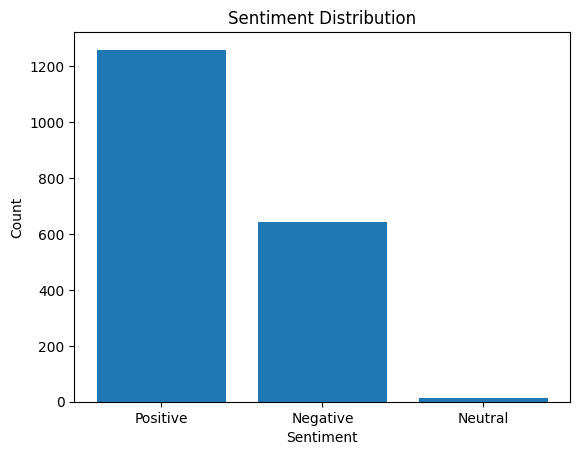

In [83]:
import matplotlib.pyplot as plt

# Plotting sentiment distribution

plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()


## **Word Cloud Visualization**

Creating word clouds to visualize the most frequent words in positive, negative, and neutral reviews. This can help identify common themes or topics associated with different sentiments.

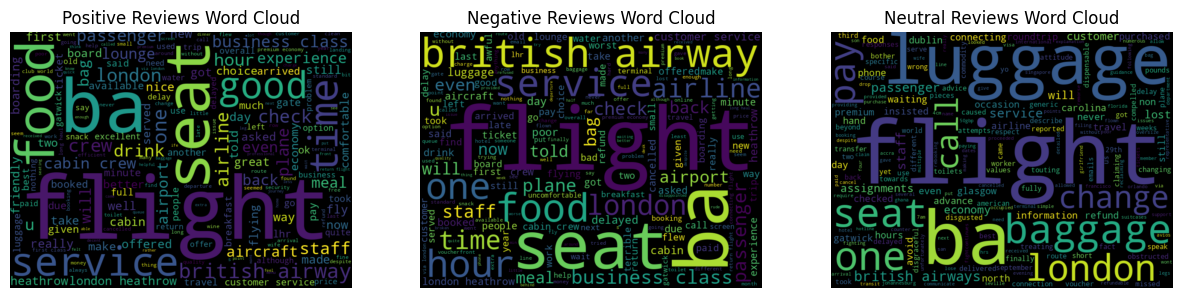

In [86]:
from wordcloud import WordCloud

# Combining all cleaned reviews for each sentiment
positive_reviews = ' '.join(da[da['Sentiment'] == 'Positive']['Cleaned Review'])
negative_reviews = ' '.join(da[da['Sentiment'] == 'Negative']['Cleaned Review'])
neutral_reviews = ' '.join(da[da['Sentiment'] == 'Neutral']['Cleaned Review'])

# Generating word clouds
wordcloud_positive = WordCloud(width=800, height=600).generate(positive_reviews)
wordcloud_negative = WordCloud(width=800, height=600).generate(negative_reviews)
wordcloud_neutral = WordCloud(width=800, height=600).generate(neutral_reviews)

# Displaying word clouds
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(132)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.subplot(133)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Neutral Reviews Word Cloud')
plt.axis('off')

plt.show()


# **Topic Modeling**

Topic modeling techniques such as Latent Dirichlet Allocation (LDA) or Non-Negative Matrix Factorization (NMF) can be used to identify underlying themes in the reviews.

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation



In [96]:
# A list of preprocessed reviews in 'cleaned_reviews'
vectorizer = CountVectorizer(max_features=1000, stop_words='english')

# Fitting and transforming the 'Cleaned Review' column
X = vectorizer.fit_transform(da['Cleaned Review'])

# Assuming 'X' is the term-document matrix created using CountVectorizer
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Getting the most important words for each topic
feature_names = vectorizer.get_feature_names_out()  # Corrected method name

for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:", [feature_names[i] for i in topic.argsort()[-10:]])

Topic 0: ['seats', 'london', 'economy', 'business', 'flight', 'seat', 'service', 'food', 'class', 'ba']
Topic 1: ['customer', 'check', 'airport', 'airways', 'told', 'british', 'hours', 'london', 'ba', 'flight']
Topic 2: ['paid', 'service', 'british', 'airways', 'class', 'business', 'seats', 'seat', 'ba', 'flight']
Topic 3: ['service', 'ba', 'cabin', 'seat', 'food', 'london', 'good', 'time', 'crew', 'flight']
Topic 4: ['cabin', 'food', 'meal', 'ba', 'crew', 'good', 'service', 'club', 'flight', 'lounge']


# **Sentiment Analysis with Advanced Models**

Advanced models like BERT (Bidirectional Encoder Representations from Transformers) have shown remarkable performance in natural language understanding tasks, including sentiment analysis. Pre-trained BERT models from libraries like Hugging Face Transformers would be used.

In [100]:
#To install the transformer library
!pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.1 MB/s eta 0:00:00


In [101]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

In [104]:
# Loading pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Preprocess and tokenize the review text
review = "Cleaned Review"
inputs = tokenizer(review, return_tensors='pt', padding=True, truncation=True)

# Performing sentiment prediction
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = torch.argmax(logits).item()

# 'predicted_class' will be the predicted sentiment class

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


For the Bert For Sequence Classification, I wasn't able to get the desired result but I thought it would be nice to have it here.

# **Predictive Modeling**

Predictive modeling involves building a machine learning model to predict sentiment based on certain features. A labeled dataset where reviews are annotated with sentiments and features would be needed.

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [111]:
# Assuming 'da' is the DataFrame with 'Review Text' and 'Sentiment' columns
X = da['Review Text']
y = da['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Predict sentiments and evaluate the model
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:\n", confusion)




Accuracy: 0.77
Precision: 0.77
Recall: 0.77
F1-Score: 0.75
Confusion Matrix:
 [[ 53   0  71]
 [  1   0   1]
 [ 14   0 244]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


It's essential to evaluate the performance thoroughly. While accuracy is a common metric, other metrics like precision, recall, F1-score, and confusion matrix are considered.